In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

In [2]:
df= pd.read_csv('./Downloads/california_housing_test.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [3]:
column_to_drop=['longitude','latitude','population']

In [4]:
df= df.drop(column_to_drop, axis=1)

In [5]:
df.describe()


,housing_median_age,total_rooms,total_bedrooms,households,median_income,median_house_value
count,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,28.845333,2599.578667,529.950667,489.91200,3.807272,205846.27500
std,12.555396,2155.593332,415.654368,365.42271,1.854512,113119.68747
min,1.000000,6.000000,2.000000,2.00000,0.499900,22500.00000
25%,18.000000,1401.000000,291.000000,273.00000,2.544000,121200.00000
50%,29.000000,2106.000000,437.000000,409.50000,3.487150,177650.00000
75%,37.000000,3129.000000,636.000000,597.25000,4.656475,263975.00000
max,52.000000,30450.000000,5419.000000,4930.00000,15.000100,500001.00000


<Axes: >

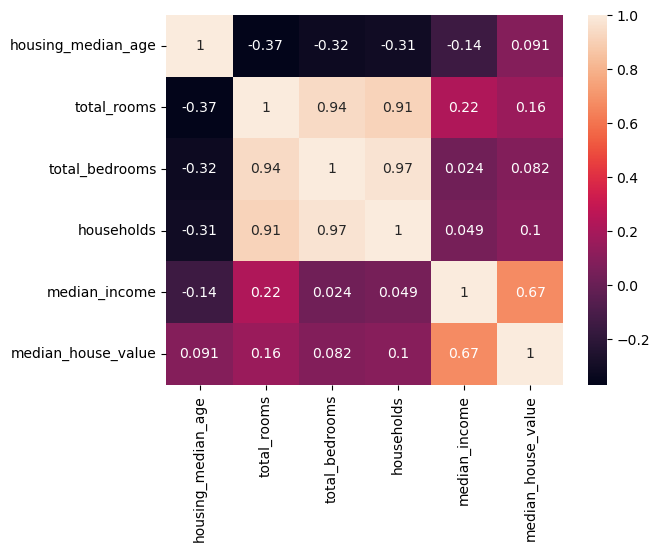

In [6]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

/home/oem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/oem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/oem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/oem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


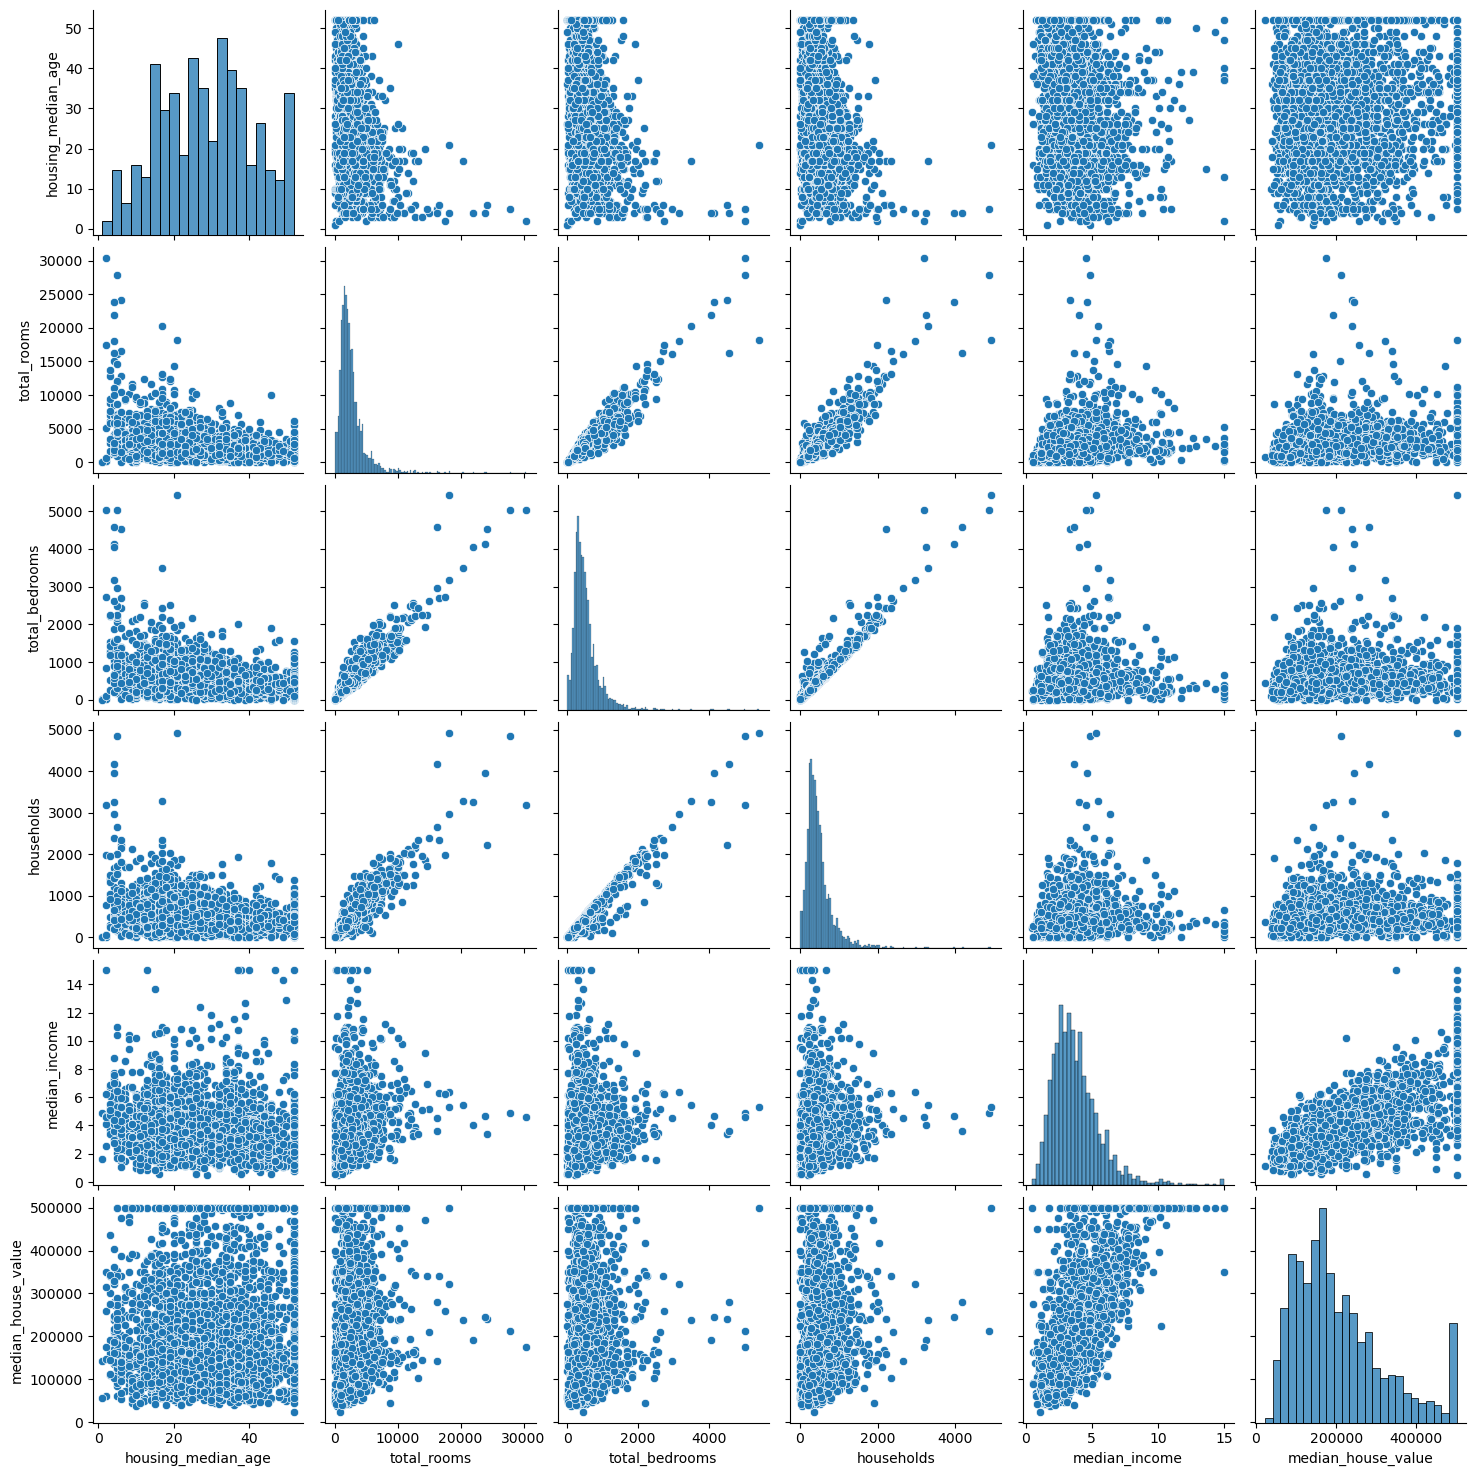

In [7]:
sns.pairplot(df)

In [8]:
scaling= StandardScaler()
scaled = scaling.fit_transform(df)

In [9]:
scaled_df=pd.DataFrame(scaled,columns=df.columns)
#scaled dataset
scaled_df.head()

,housing_median_age,total_rooms,total_bedrooms,households,median_income,median_house_value
0,-0.147000,0.596418,0.315337,0.317734,1.510745,1.227699
1,1.127565,-0.505550,-0.529255,-0.582743,-0.112324,-0.259470
2,-0.147000,0.459078,-0.055225,0.013926,1.071149,0.571647
3,-0.067340,-1.175083,-1.239098,-1.310788,1.255865,1.097726
4,-0.784282,-0.630362,-0.688068,-0.692223,-0.469081,-1.097660


/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

<function matplotlib.pyplot.show(close=None, block=None)>

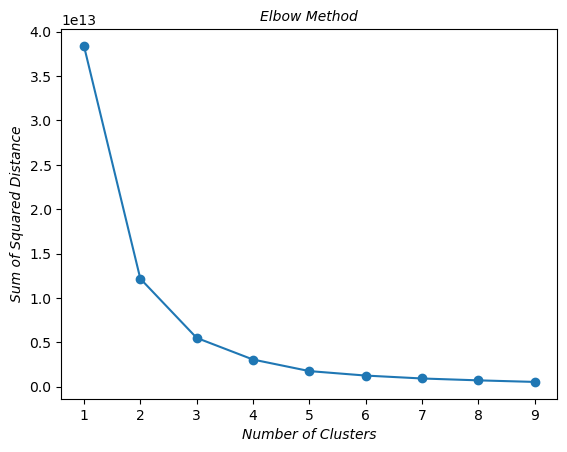

In [10]:
a=[]
K=range(1,10)
for i in K:
    Kmean= KMeans(n_clusters=i)
    Kmean.fit(df)
    a.append(Kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method', fontsize=10, fontstyle='italic')
plt.xlabel('Number of Clusters', fontsize=10, fontstyle='italic')
plt.ylabel('Sum of Squared Distance', fontsize=10, fontstyle='italic')
plt.show

In [11]:
Kmeans = KMeans(n_clusters=2, random_state=111)
Kmeans.fit(scaled_df)

/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=111)

In [12]:
pd.Series(Kmeans.labels_).value_counts()

0    2548
1     452
Name: count, dtype: int64

In [13]:
metrics.silhouette_score(scaled_df, Kmeans.labels_)

0.40261384238044934

In [14]:
cluster_labels = Kmeans.fit_predict(scaled_df)

/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
preds= Kmeans.labels_
Kmeans_df = pd.DataFrame(df)
Kmeans_df['KMeans_Clusters']= preds
Kmeans_df.head(10)

,housing_median_age,total_rooms,total_bedrooms,households,median_income,median_house_value,KMeans_Clusters
0,27.0,3885.0,661.0,606.0,6.6085,344700.0,0
1,43.0,1510.0,310.0,277.0,3.5990,176500.0,0
2,27.0,3589.0,507.0,495.0,5.7934,270500.0,0
3,28.0,67.0,15.0,11.0,6.1359,330000.0,0
4,19.0,1241.0,244.0,237.0,2.9375,81700.0,0
5,37.0,1018.0,213.0,204.0,1.6635,67000.0,0
6,43.0,1009.0,225.0,218.0,1.6641,67000.0,0
7,19.0,2310.0,471.0,441.0,3.2250,166900.0,0
8,15.0,3080.0,617.0,599.0,3.6696,194400.0,0
9,31.0,2402.0,632.0,603.0,2.3333,164200.0,0


/home/oem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/oem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/oem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/oem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


<Axes: xlabel='median_house_value', ylabel='KMeans_Clusters'>

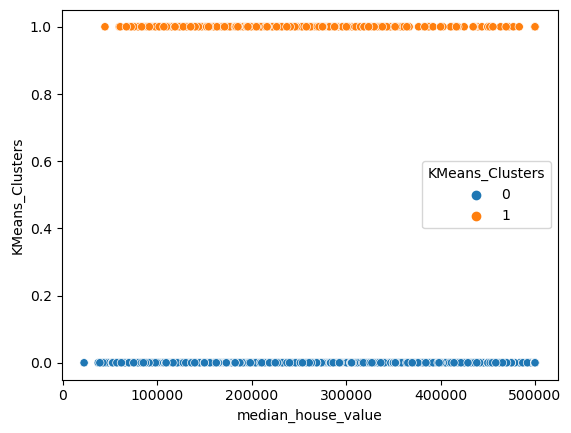

In [17]:
sns.scatterplot(x=Kmeans_df['median_house_value'], y=Kmeans_df['KMeans_Clusters'],hue = Kmeans_df['KMeans_Clusters'])

